# Знакомство с данными

In [1]:
import pandas as pd

In [2]:
churn_data = pd.read_csv('data_визуализация данных/churn.csv')

In [3]:
churn_data.drop('RowNumber',axis=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import plotly
import plotly.express as px

## Задания 

#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

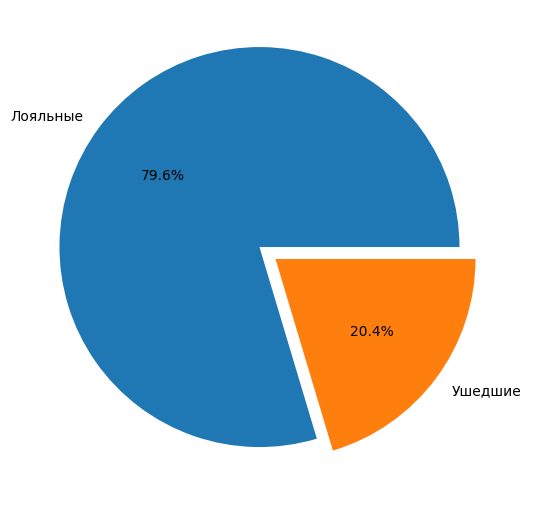

In [7]:
pie_data = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_data,
    labels=('Лояльные', 'Ушедшие'),
    autopct='%1.1f%%',
    explode = [0.1, 0]
);

Вывод: Количество лояльных клиентов значительно превышает, однако 1/5 часть прекратила пользование услугами банка 

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

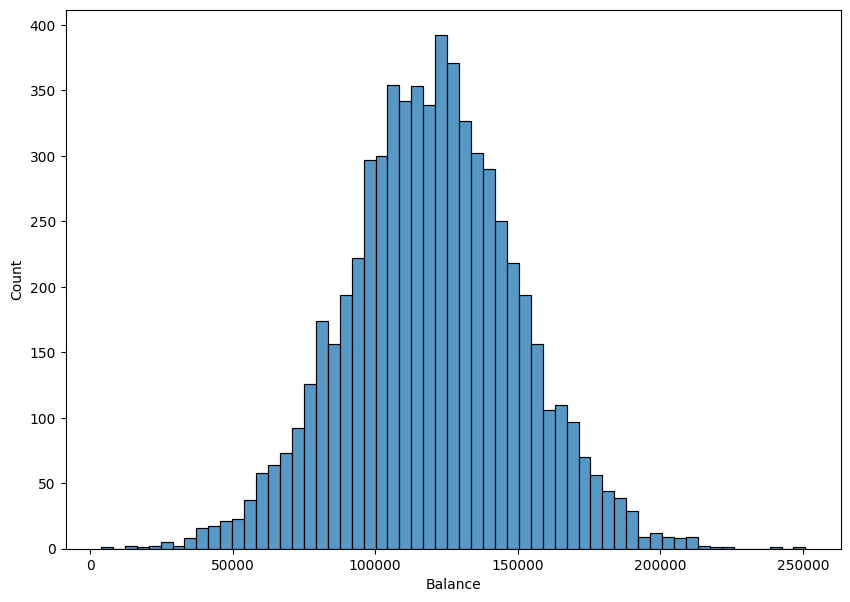

In [8]:
histplot_data = churn_data[churn_data['Balance']>= 2500]
boxplot = fig = plt.figure(figsize=(10, 7))
sns.histplot(
    data=histplot_data,
    x='Balance'
);

Вывод: Перед нами нормальное распределение. В большинстве случаев баланс находится между 100000 и 150000 

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [9]:
task_3 = churn_data[churn_data['Exited'] == 0]
fig = px.histogram(
    data_frame= task_3, 
    x='Balance',
    title='Распределение баланса клиента в разрезе признака ушедших клиентов'
)
fig.show()

In [10]:
task_3_2 = churn_data[churn_data['Exited'] == 1]
fig = px.histogram(
    data_frame= task_3_2, 
    x='Balance',
    title='Распределение баланса клиента в разрезе признака лояльных клиентов'
)
fig.show()

Вывод: Большое количество ушедших клиентов с нулевым балансом, лояльных с тем же показателем меньше в 6 раз. 

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

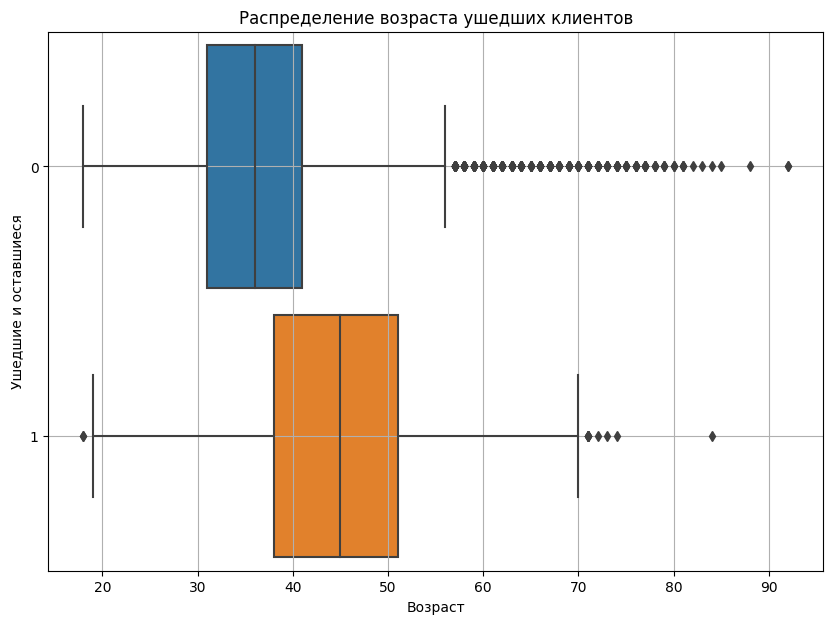

In [11]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста ушедших клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Ушедшие и оставшиеся');
boxplot.grid()

Вывод: Ушедшие клиенты находятся в возрасте от 40 до 50 лет, возможно стоит обратить на них внимание. Потенциальных выбросов больше у оставшихся клиентов. 

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [12]:
fig = px.ecdf(
    churn_data,
    x="CreditScore", 
    y="EstimatedSalary",  
    color = 'IsActiveMember'
)
fig.show()

Вывод: У ушедших клиентов ожидаемая ЗП несколько выше. 

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

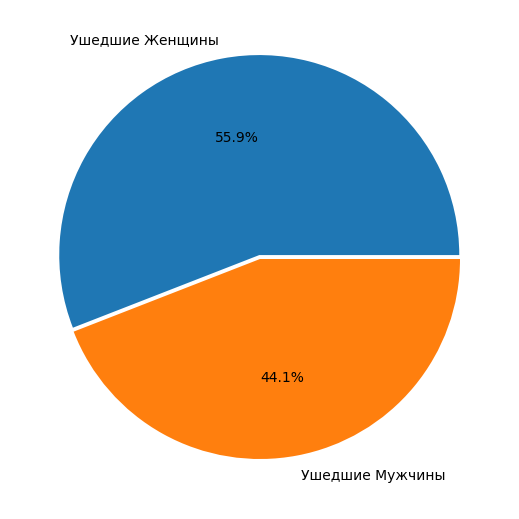

In [19]:
pie_info = churn_data[churn_data['Exited']== 1]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_info.groupby('Gender')['Exited'].value_counts(),
    labels=('Ушедшие Женщины', 'Ушедшие Мужчины'),
    autopct='%.1f%%',
    explode = [0.02, 0]
);

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [14]:
bar_info_1 = churn_data[churn_data['Exited']== 1]
fig = px.bar(
    data_frame=bar_info_1, #датафрейм
    x="NumOfProducts", #ось x
    y="Exited", #ось y
    color='NumOfProducts',
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Как отток клиентов зависит от числа приобретённых у банка услуг' #заголовок
)

#отображаем его
fig.show()

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(
    labels=['Неактивные ушедшие клиетны', 'Активные ушедшие клиенты'], 
    values=churn_data[churn_data.Exited ==1]['IsActiveMember'].value_counts(), 
    hole= .1, 
    textinfo='percent', 
    insidetextorientation='radial', marker=dict(colors=['blue', 'red'], line=dict(color='#000000', width=2))
    ), 1, 2)

fig.add_trace(go.Pie(
    labels=['Активные клиетны', 'Неактивные клиенты'], 
    values=churn_data[churn_data.Exited ==0]['IsActiveMember'].value_counts(), 
    hole=.1, 
    textinfo='percent', 
    insidetextorientation='radial', marker=dict(colors=['red', 'blue'], line=dict(color='#000000', width=2))
    ), 1, 1)

Вывод: Активные действующие клиенты: 55,5%, для сравнение ушедшие - 36.1 
Следовательно, банку стоит повышать лояльность клиентов выгодными предложениями. 

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [16]:
fig = px.choropleth(
    data_frame=churn_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

Вывод: В Европейской части наблюдается отток в большей мере, возможно из-за внутриэкономической ситуации/санкций 

#### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

<Axes: xlabel='Tenure', ylabel='CreditScoreCat'>

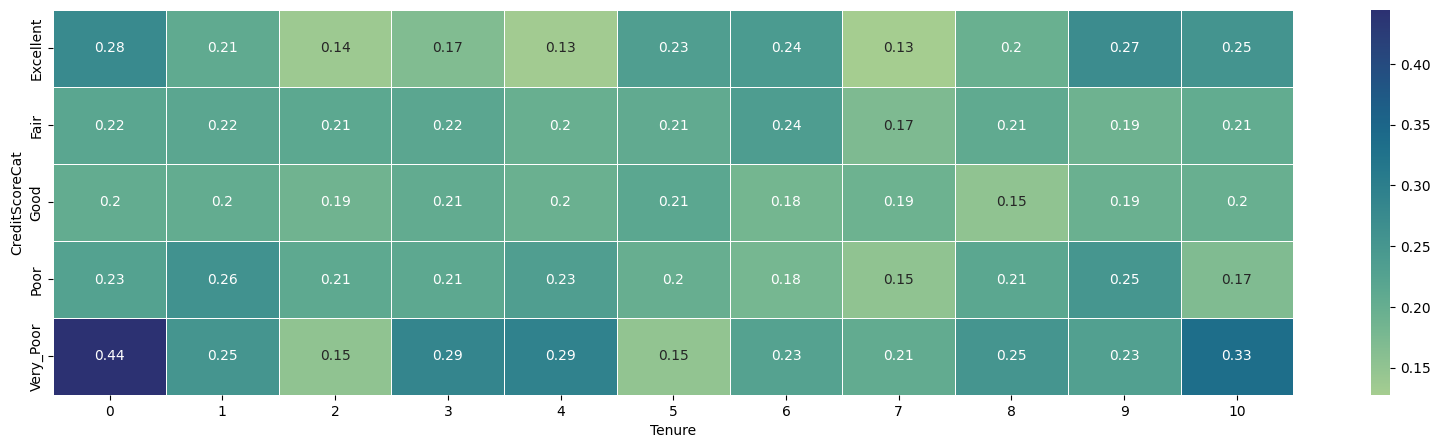

In [17]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(
    churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean'), 
    annot = True, 
    linewidth=.5, 
    cmap="crest") 


Вывод: Very_Poor с нахождением в банке до года уходят чаще всего.